<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Regression Analysis of Avocado Dataset by Sachin Durge 

### Table of Contents
1. [Importing the packages](#section1)<br/>

2. [Introduction](#section2)<br/>

3. [Importing Avocado Dataset](#section3)<br/>

4. [Data Profiling](#section4)<br/>
    -- 4.1 [Understanding the Dataset](#section4.1)<br/>
    -- 4.2 [Pre profiling of the dataset](#section4.2)<br/>
    -- 4.3 [Pre processing the dataset](#section4.3)<br/>
    
5. [Exploratory Data Analysis](#section5)<br/>

6. [Regression Analysis](#section6)<br/>
    -- 6.1 [Decision tree regression](#section6.1)<br/>
    -- 6.2 [Linear Regression using Grid search](#section6.2)<br/>

7. [OLS Regression](#section7)<br/>

8. [Pretty Table comparision](#section8)<br/>

9. [Conclusion](#section9)<br/>

<a name = "section1"></a>
# 1.Importing the packages

In [ ]:
import numpy as np                                                 # Enables multi-dimensional array and matrices
import pandas as pd                                                # It enables data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
import sys                                                                      # Import packages
pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 22columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
from subprocess import check_output
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
# Load libraries
from sklearn import model_selection
from sklearn.metrics import classification_report

<a name = "section2"></a>
# 2.Introduction
The Analysis is done on the Avocados Dataset. As the dataframe target variable is continous in nature the application of Regression analysis is conducted in this project. There is a requirement of utilization of various packages of that enables me to conduct the analysis in an appropriate form. This analysis helps us to consider the best fit model that helps us in prediction of avocados sales and its average prices in the US market.

## About the Avocados Dataset
-Date - The date of the observation

-AveragePrice - the average price of a single avocado

-type - conventional or organic

-year - the year

-Region - the city or region of the observation

-Total Volume - Total number of avocados sold

-4046 - Total number of avocados with PLU 4046 sold

-4225 - Total number of avocados with PLU 4225 sold

-4770 - Total number of avocados with PLU 4770 sold


## Problem Statement

- In this analysis it is to be explored that what features does have impact on the AveragePrices of the Avocados in the US market.
- To identify the model that best fits the dataset in predicting the predictor variable(AveragePrices) against the response variables of Avocado dataset.
- To explore the dataset of Avocados by using Exploratory Data Analysis techniques.
- To visualize the correlation of the features present in the Avocados dataset in order to gain insights.
- Which is the feature that contribute in predicting AveragePrices of Avocados in the US market.?

<a name = "section3"></a>
# 3. Importing Avocado dataset

In [3]:
df=pd.read_csv("avocado.csv")

<a name = "section4"></a>
# 4. Data profiling

<a name = "section4.1"></a>
## 4.1 Understanding the dataset

In [4]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [5]:
df.shape                           # This shall print number of rows and comlumns of the Data Frame

(18249, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observation: 
- The AveragePrice of Avocados in the US market has a minimum of 0.40 and maximum of 3.25.
- The Total Volume of Avocados that had been sold at max were 6.2 and maximum of 8.5 of units.
- Most of the Avocados sold in the large bags with of 5.7 units and least were small bags of 1.3 units.

<a name = "section4.2"></a>
# 4.2 Pre profiling of the dataset

In [8]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="avocado_before_preprocessing.html")

C:\Users\welcome\Anaconda3\lib\site-packages\pandas_profiling\describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


<a name = "section4.3"></a>
## 4.3 Pre processing the dataset

In [9]:
type(df.region)

pandas.core.series.Series

In [10]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

<a name = "section5"></a>
# 5. Exploratory data analysis

In [14]:
dfnew = df.copy(deep=True)                         # creating a new dataframe to make any datatype changes over it and keep the dataframe as its original form.

In [15]:
dfnew.drop(['region','Unnamed: 0'], axis=1,inplace=True)  # There are lot of unique values inside region feature thus dropping them instead of creating many variables using one hot encoding.

In [16]:
dfnew['Date'] = pd.DatetimeIndex ( df['Date'] ).astype ( np.int64 )/1000000  # Inorder to make ease in predictions the data feature has been converted into unix format.

### Creation of Dummy variables

In [17]:
type_dummies = pd.get_dummies(dfnew.type, prefix='type')

In [18]:
type_dummies.head()

,type_conventional,type_organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [19]:
dfnew = pd.concat([dfnew, type_dummies], axis=1)         # This functions enables the created dummy variable to be added into the dataframe.

In [20]:
dfnew.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,type_conventional,type_organic
0,1.451174e+12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,1,0
1,1.450570e+12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,1,0
2,1.449965e+12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,1,0
3,1.449360e+12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,1,0
4,1.448755e+12,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,1,0


In [21]:
dfnew=dfnew.drop(['type','type_conventional'],axis=1)   

In [22]:
dfnew.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,1.451174e+12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.450570e+12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,1.449965e+12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.449360e+12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.448755e+12,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


In [23]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
Date            18249 non-null float64
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
year            18249 non-null int64
type_organic    18249 non-null uint8
dtypes: float64(10), int64(1), uint8(1)
memory usage: 1.5 MB


C:\Users\welcome\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


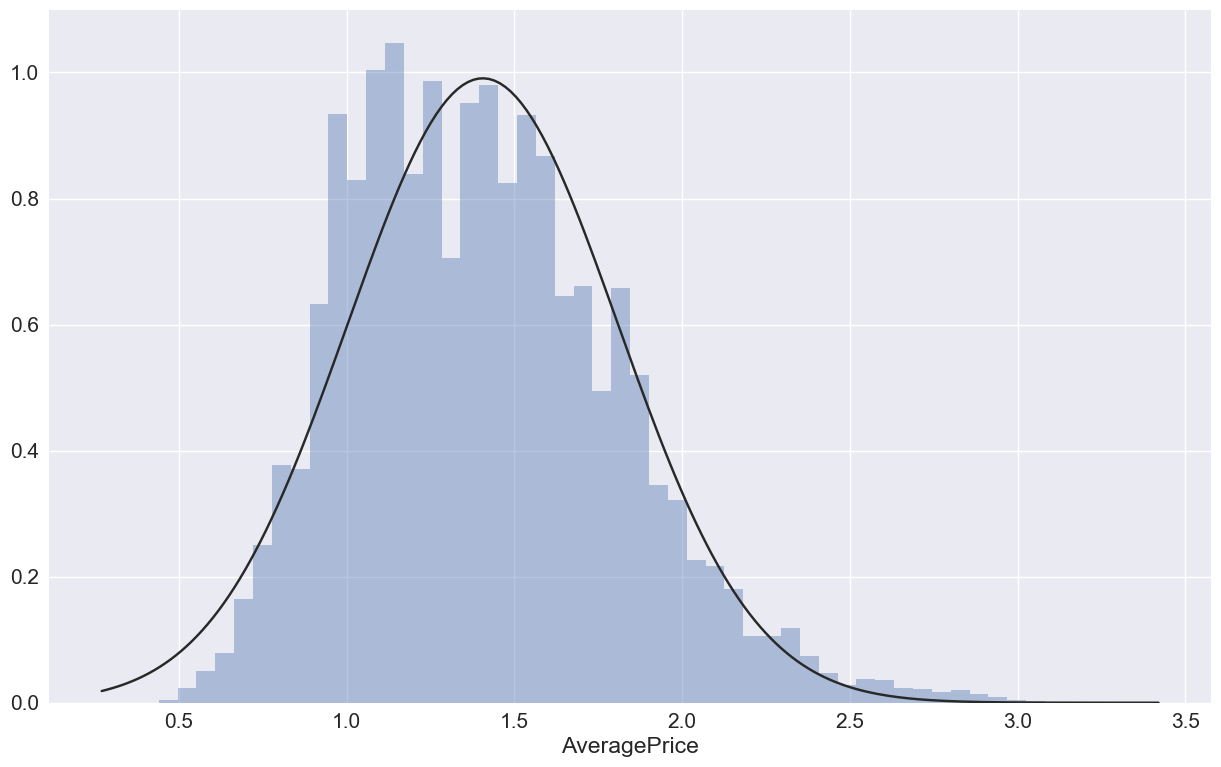

In [24]:
from scipy.stats import norm
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=dfnew.AveragePrice, kde=False, fit=norm)

Observation: It could be identified that AveragePrice of Avocado is between 1.4 to 1.5 and the prices are normally distributed.

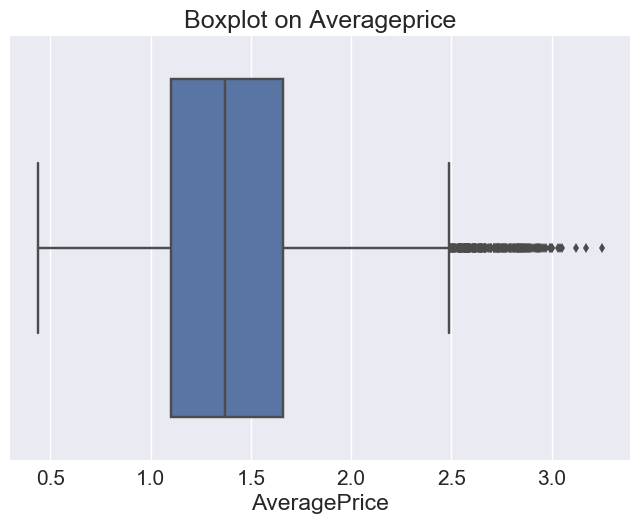

In [25]:
plt.title("Boxplot on Averageprice")
ax = sns.boxplot(dfnew["AveragePrice"])

Observation: From the above graph it is identified that there are some outliers in AveragePrice of Avocados in the market those outliers are being after 2.5.

Text(0.5,1,'Average Price')

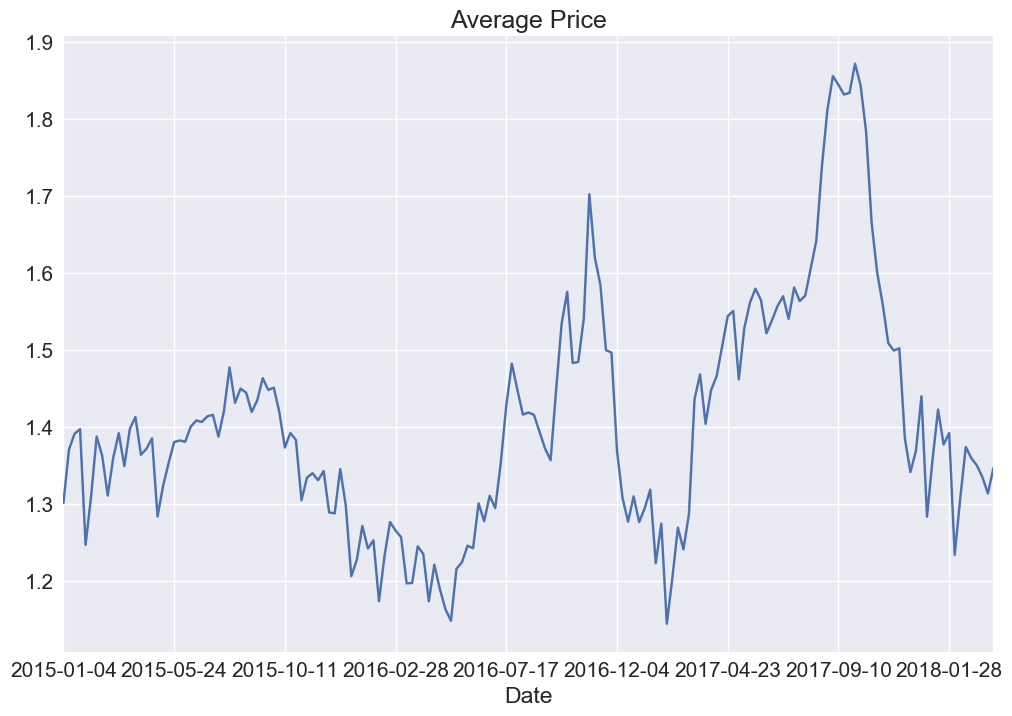

In [26]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

Observation: During 2017-09-10 the AveragePrice of Avocados are high in comparision to the other date.

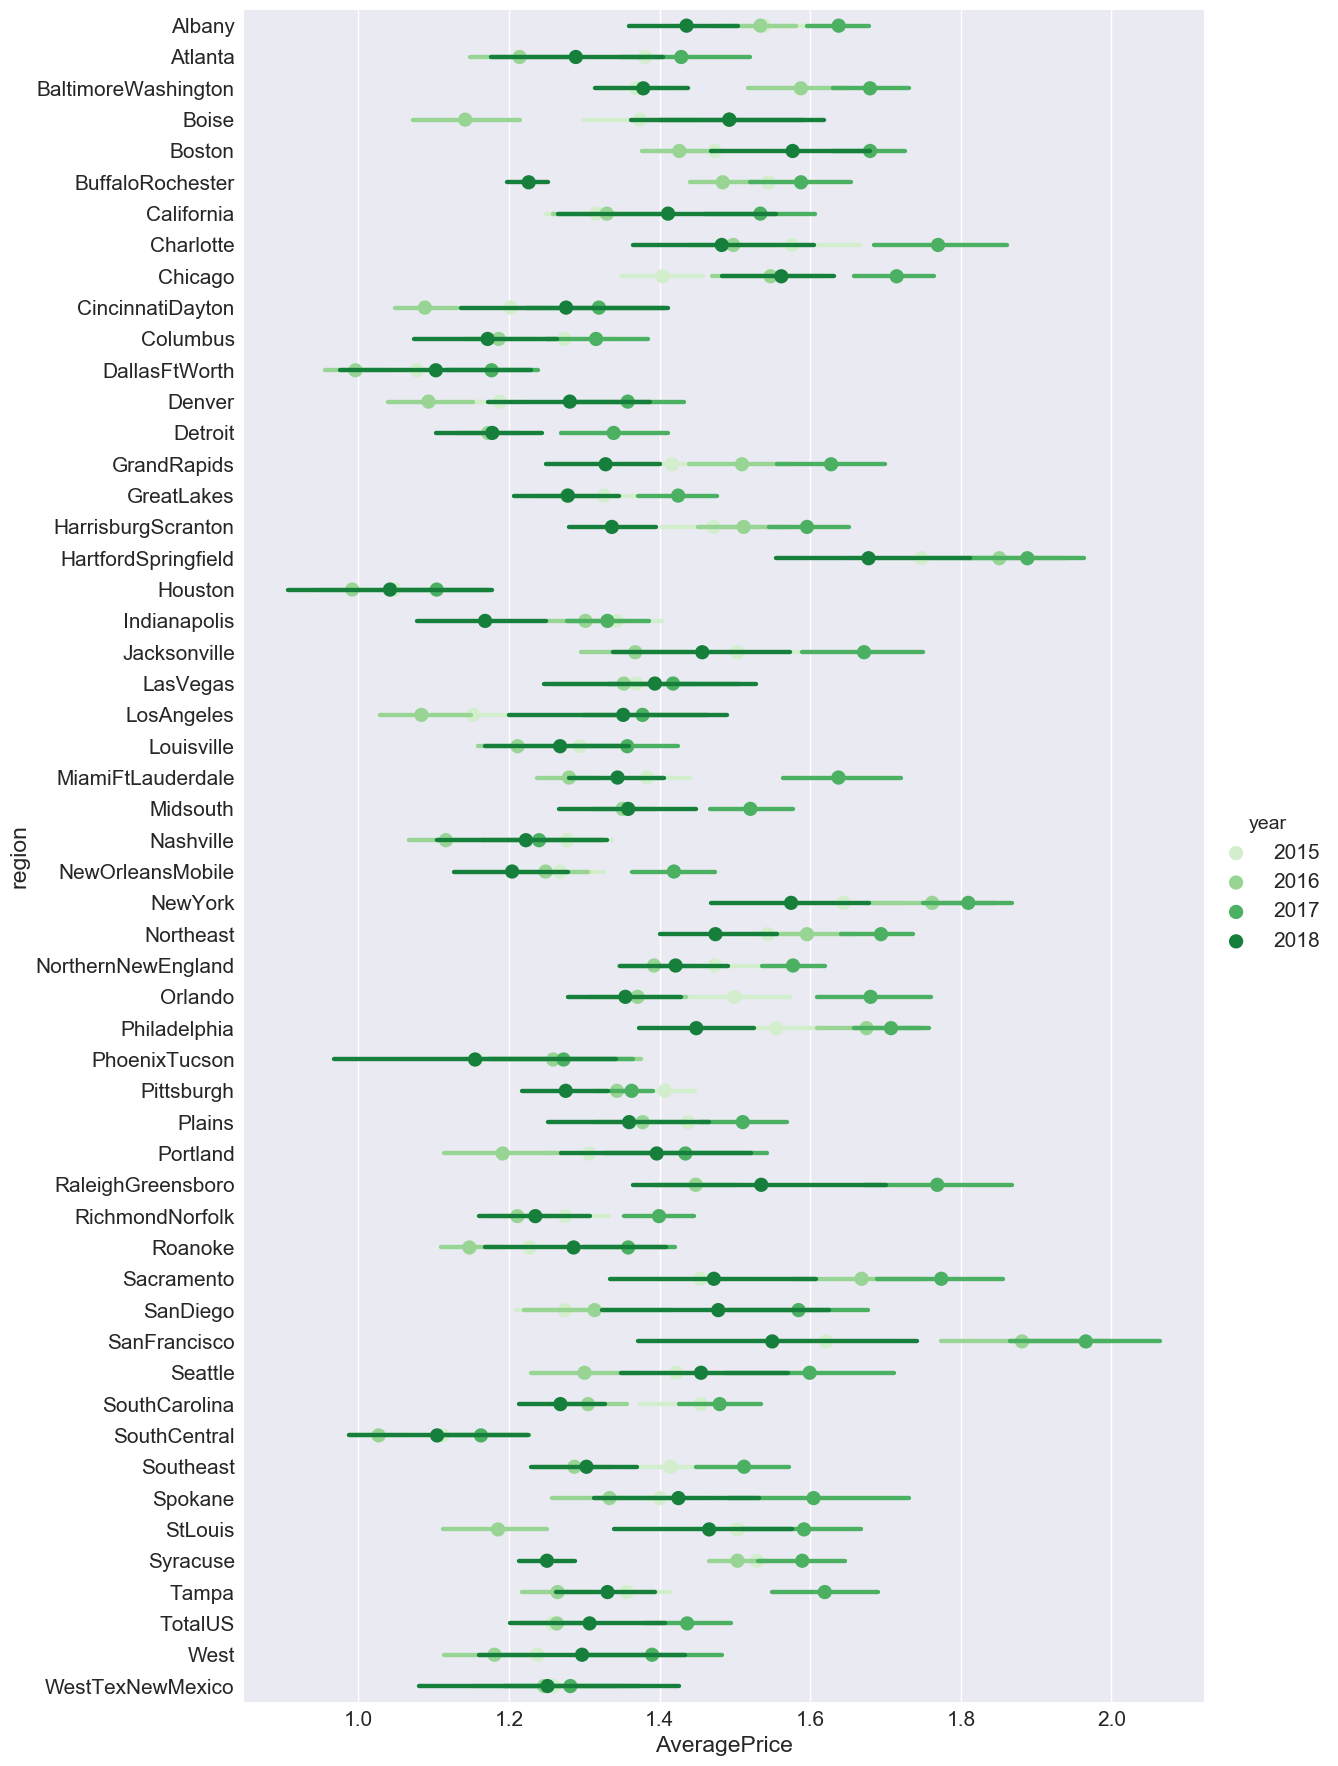

In [27]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Greens',
                   join=False,
              )

Observation: In SanFrancisco and HartfordSpringfield, the AveragePrices of Avocado were between 1.8 to 2.0 are were high during the year 2017.
             Lowest AveragePrice of Avocado were 1.0 during the year 2016.

## Standardization of the dataset

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(dfnew))
print(scaler.transform(dfnew))

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.67635986 -0.18868864 -0.22771641 ... -0.17557961 -1.22128204
  -0.99983562]
 [-0.69685742 -0.13901962 -0.23042664 ... -0.17557961 -1.22128204
  -0.99983562]
 [-0.71735497 -1.18206895 -0.21208462 ... -0.17557961 -1.22128204
  -0.99983562]
 ...
 [ 1.53737632  1.15237477 -0.24233073 ... -0.17557961  1.97050371
   1.00016441]
 [ 1.51687877  1.30138182 -0.24162464 ... -0.17557961  1.97050371
   1.00016441]
 [ 1.49638121  0.53151208 -0.24125273 ... -0.17557961  1.97050371
   1.00016441]]


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [29]:
dfnew.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'type_organic'],
      dtype='object')

### Feature Engineering

In [30]:
y=dfnew['AveragePrice']    # The AveragePrice variable is represented as y.
y.head(2)

0    1.33
1    1.35
Name: AveragePrice, dtype: float64

In [31]:
dfnew=dfnew.drop(['AveragePrice'],axis=1)

In [32]:
dfnew.columns

Index(['Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'type_organic'],
      dtype='object')

In [33]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(18249,)


In [34]:
dfnew.head(2)

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,1.451174e+12,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.450570e+12,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0


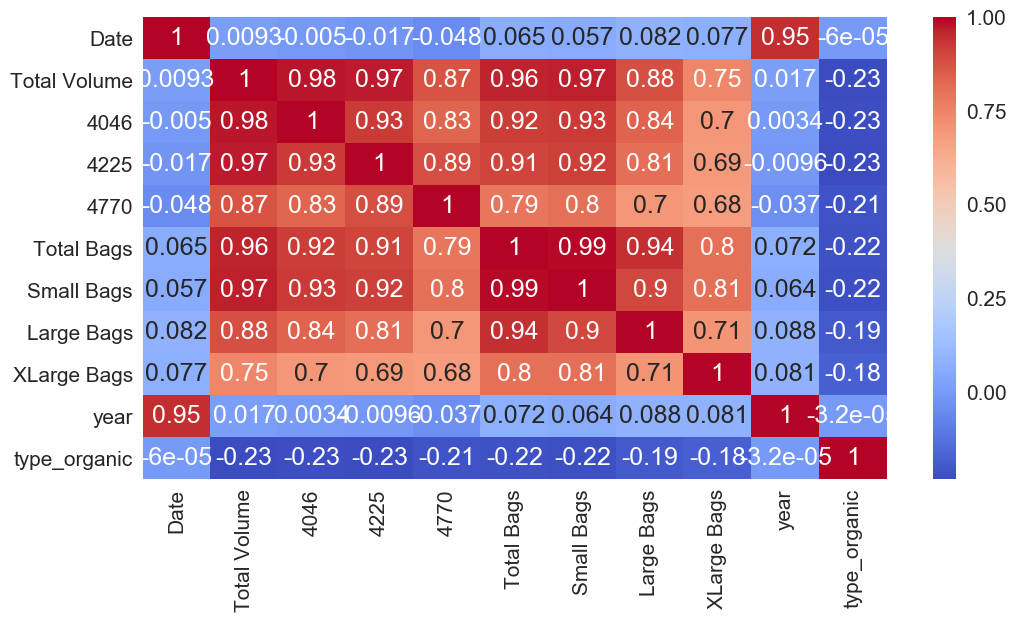

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(dfnew.corr(),cmap='coolwarm',annot=True)

Observation: From the Heat map it is identified that there is a strong correlation between Total Volume and Total Bags, Small Bags, Large Bags and XLarge Bags.   

### The below features of dataset are to be dropped due to their high correlation with each other, that has been identified in the preprofiling and correlation of the dataset.

In [36]:
dfnew.drop(['Small Bags','4046','4225'], axis=1,inplace=True)

In [37]:
dfnew.drop(['Total Bags','year'], axis=1,inplace=True)

In [38]:
dfnew.drop(['Date'], axis=1,inplace=True)

## Post profiling the Dataset

In [39]:
profile = pandas_profiling.ProfileReport(dfnew)
profile.to_file(outputfile="avocado_after_preprocessing.html")

C:\Users\welcome\Anaconda3\lib\site-packages\pandas_profiling\describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


<a name = "section6"></a>
# 6. Regression Analysis 

<a name = "section6.1"></a>
# 6.1 Desision tree Regression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(dfnew, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14599, 5) (14599,)
(3650, 5) (3650,)


In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0,0.5,'Predicted Y')

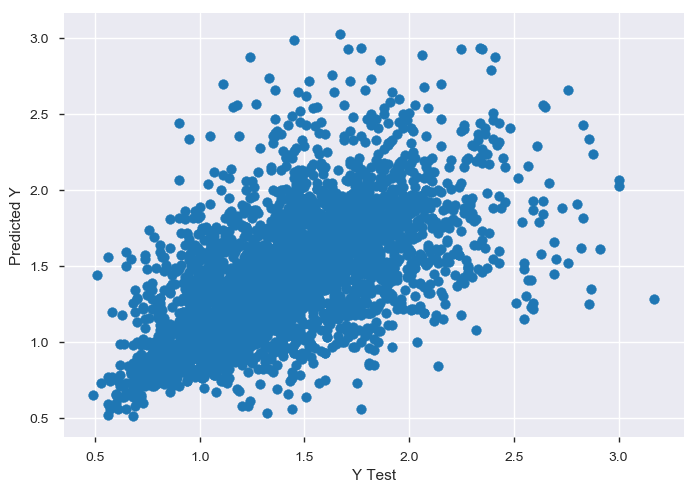

In [42]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Observation: From the above decision tree regression plot the dataset is approximately normally distributed.

In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.24163013698630137
Mean Squared Error: 0.12061953424657534
Root Mean Squared Error: 0.34730323097629734


Observation: The RMSE for decision tree regression is .34 

<a name = "section6.2"></a>
# 6.2 Linear Regression using Grid search

In [44]:
X_train, X_test, y_train, y_test = train_test_split(dfnew, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14599, 5) (14599,)
(3650, 5) (3650,)


In [45]:
def linear_reg( X, y, gridsearch = True):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train)

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set
        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))
        print("bestestimator",linreg.best_estimator_)
        
    return linreg,y_pred_test

In [46]:
def split(X,y):
    return train_test_split(X, y, test_size=0.2)

In [47]:
X = dfnew
y = y
linreg,predictions = linear_reg(X,y)

Mean cross-validated score of the best_estimator :  0.3854629048654167
RMSE for the test set is 0.10140704734540414
bestestimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.3767503267312051
Mean Squared Error: 0.2223009460012808
Root Mean Squared Error: 0.4714880125743186


Observation: Linear regression using Grid search is observed to be .47 which is higher than the decision tree model.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(dfnew, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14599, 5) (14599,)
(3650, 5) (3650,)


In [50]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
linreg.coef_

array([ 1.48894104e-09, -2.19986643e-07, -1.21559321e-07,  1.70762760e-06,
        4.89254512e-01])

In [52]:
dfnew.columns

Index(['Total Volume', '4770', 'Large Bags', 'XLarge Bags', 'type_organic'], dtype='object')

<a name = "section7"></a>
# 7. OLS Regression

In [53]:
X_train, X_test, y_train, y_test = train_test_split(dfnew, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14599, 5) (14599,)
(3650, 5) (3650,)


In [54]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     5869.
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:16:10   Log-Likelihood:                -18192.
No. Observations:               14599   AIC:                         3.639e+04
Df Residuals:                   14594   BIC:                         3.643e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Total Volume   8.33e-08   6.62e-09     12.588   

<a name = "section8"></a>
# 8. Pretty Table comparision 

In [55]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Regression methods","RMSE"]

x.add_row(["Tree Regression", "0.34730323097629734"])
x.add_row(["LM with grid search", "0.4714880125743186"])
print(x)

+---------------------+---------------------+
|  Regression methods |         RMSE        |
+---------------------+---------------------+
|   Tree Regression   | 0.34730323097629734 |
| LM with grid search |  0.4714880125743186 |
+---------------------+---------------------+


Observation: Tree regression has less RMSE thus this model is good.

<a name = "section9"></a>
# 9. Conclusion:

- From the Exploratory data analysis there are features such as 4046, 4225,
large bags, small bags and total bags that are highly correlated.
- Because of high correlation between the features of avocado dataset that
had led to multicollinearity they were dropped to get a best fit model for
prediction.
- From Preprofiling of Avocado dataset the some variables led to multicollinearity such as 4046,
4225, Small Bags thus they were dropped.
- We had made changes to the categorical variable(type) and changed it to as dummy variable. 
- From exploratory data analysis it could be understood that the average
prices of avocado are normally distributed and lies between 1.4 to 1.5, and
there are outliers after 2.5.
- Outliers of AveragePrices are observed to be for a specified regions
such as Houston and Sanfrancisco in the US for the year 2016 and 2017.
- The date, year, Unnamed, type, region were also dropped to achieve best
fit model of regression as they were of no use for analysis.
- Through using the linear regression using Grid Search model on Avocados
dataset the RMSE was 46 and using Decision Tree regression RMSE has reduced
to 35 which is considered to be the best fit model for this dataset.
- The features that has impacted on AveragePrices of Avocados are type_organic, largebags, totalbags, XLargebags of the dataframe.